In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
data = pd.read_csv('./data/seattleWeather_1948-2017.csv')
data.head(10)

In [73]:
prcp_data = data.rename(columns={'DATE':'ds','PRCP':'y'})[['ds','y']] # 'ds', 'y' 컬럼만 선택
prcp_data2 = prcp_data[:20000]
prcp_data3 = prcp_data[20000:]
prcp_data2

,ds,y
0,1948-01-01,0.47
1,1948-01-02,0.59
2,1948-01-03,0.42
3,1948-01-04,0.31
4,1948-01-05,0.17
...,...,...
19995,2002-09-29,0.15
19996,2002-09-30,0.00
19997,2002-10-01,0.00
19998,2002-10-02,0.00


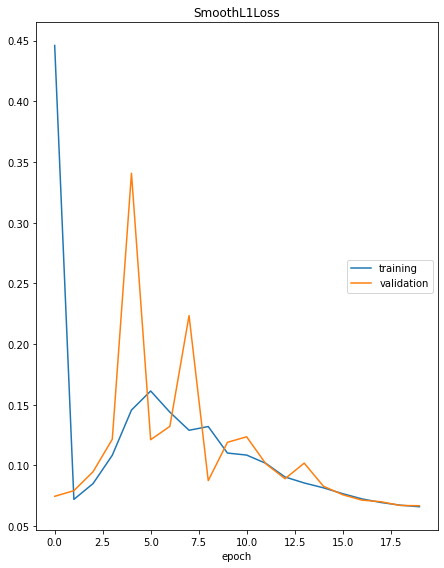

Epoch[20/20]: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s, SmoothL1Loss=0.0659, MAE=0.126, MSE=0.0508, RegLoss=0, MAE_val=0.121, MSE_val=0.0521, SmoothL1Loss_val=0.0668]


In [74]:
model = NeuralProphet()
metric = model.fit(prcp_data2, validate_each_epoch=True, # epoch 마다 퍼포먼스 검증
        valid_p=0.2, # validation data 비율
        freq='D', # frequency of data recording (D, 5min, MS)
        plot_live_loss=True,
        epochs=20)

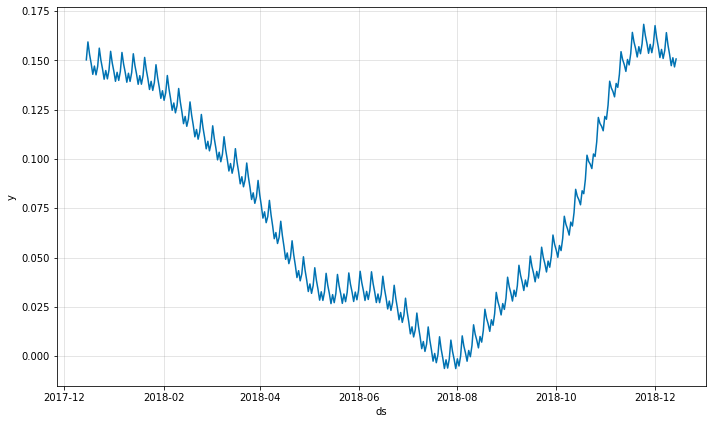

In [75]:
future = model.make_future_dataframe(prcp_data3, periods=365)
forcast = model.predict(future)
forcasts_plot = model.plot(forcast)


In [80]:
prcp_data3

,ds,y
20000,2002-10-04,0.01
20001,2002-10-05,0.02
20002,2002-10-06,0.00
20003,2002-10-07,0.00
20004,2002-10-08,0.01
...,...,...
25546,2017-12-10,0.00
25547,2017-12-11,0.00
25548,2017-12-12,0.00
25549,2017-12-13,0.00


In [ ]:
metric

Text(0.5, 1.0, 'S&P500 Prices')

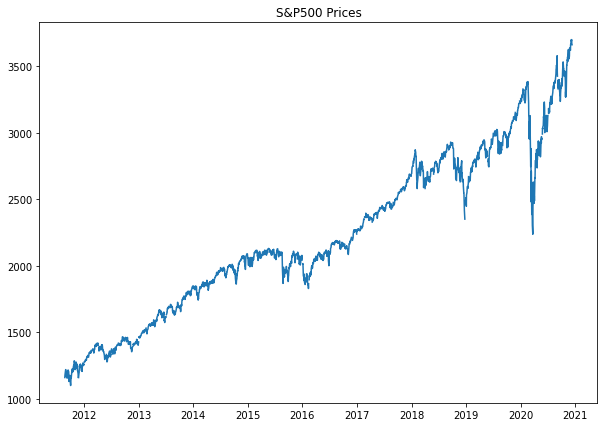

In [78]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
start = datetime(2010, 12, 13)
end = datetime(2020, 12, 11)
sp500_data = pdr.get_data_fred('sp500', start, end)
sp500_data
plt.figure(figsize=(10,7))
plt.plot(sp500_data)
plt.title('S&P500 Prices')

In [79]:
sp500_data

,sp500
DATE,
2011-08-25,1159.27
2011-08-26,1176.80
2011-08-29,1210.08
2011-08-30,1212.92
2011-08-31,1218.89
...,...
2020-12-07,3691.96
2020-12-08,3702.25
2020-12-09,3672.82


In [50]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE':'ds','sp500':'y'}) # index 컬럼을 추가한다

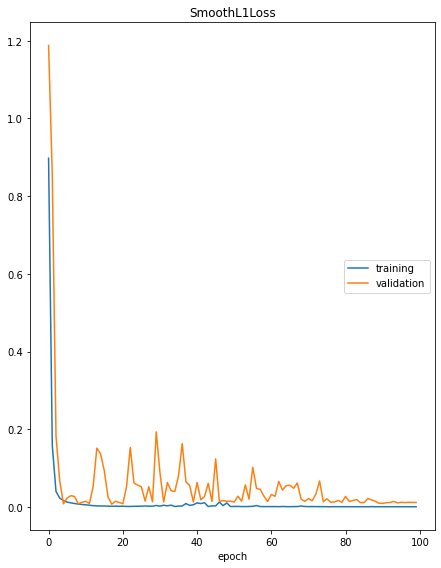

Epoch[100/100]: 100%|██████████| 100/100 [00:17<00:00,  5.72it/s, SmoothL1Loss=0.000711, MAE=43.7, MSE=4e+3, RegLoss=0.0153, MAE_val=198, MSE_val=6.59e+4, SmoothL1Loss_val=0.0117]


In [54]:
model = NeuralProphet(n_changepoints=100, # number of potential changepoints to include
        trend_reg=0.05, # Parameter modulating the flexibility of the automatic changepoint selection
        # 값이 커질수록 (1~100) 변경 지점의 변동성이 작아지고, 값이 작을수록 (0.001~1.0) 변경 지점의 변동성이 커진다
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False)
metric = model.fit(sp500_data, validate_each_epoch=True, # epoch 마다 퍼포먼스 검증
        valid_p=0.2, # validation data 비율
        freq='D', # frequency of data recording (D, 5min, MS)
        plot_live_loss=True,
        epochs=100)

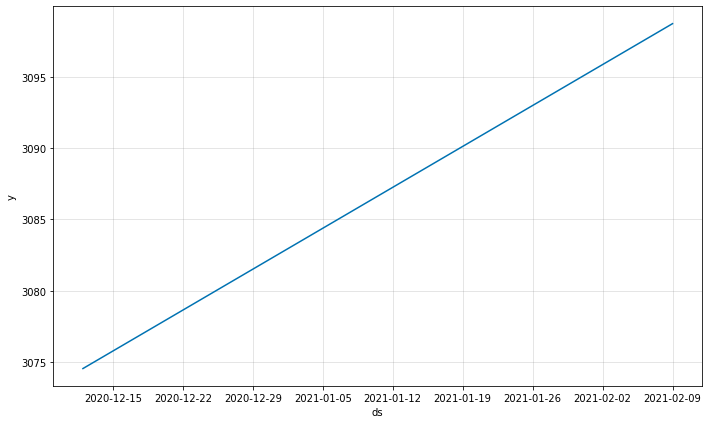

In [58]:
future = model.make_future_dataframe(sp500_data, periods=60)
forcast = model.predict(future)
forcasts_plot = model.plot(forcast)